# scATAC-seq preprocessing + pycisTopic

Import libraries and work directory

In [35]:
import pandas as pd
import os
import anndata
import scanpy as sc
from scipy.sparse import csr_matrix
from tqdm import tqdm
import numpy as np

work_dir = 'output'
os.makedirs(f'{work_dir}/scATAC', exist_ok=True)

Read the data

In [2]:
# read multiomics data 
multiome_var_meta = pd.read_csv('/home/roger/Github/OpenProblems/multiome_var_meta.csv')
multiome_train = pd.read_parquet('/home/roger/Github/OpenProblems/multiome_train.parquet')
multiome_obs_meta = pd.read_csv('/home/roger/Github/OpenProblems/multiome_obs_meta.csv')

Create peaks matrix

In [3]:
# extract only peaks
peaks_locations = multiome_var_meta[multiome_var_meta['feature_type']=='Peaks']['location'].values
df_peaks = multiome_train[multiome_train['location'].isin(peaks_locations)].reset_index(drop=True)
del multiome_train


In [4]:
df_peaks

,obs_id,location,count,normalized_count
0,000225c1151ab841,chr10:100346599-100347467,2,2.664076
1,000225c1151ab841,chr10:101214564-101215355,2,4.966185
2,000225c1151ab841,chr10:101353529-101354425,4,1.627825
3,000225c1151ab841,chr10:101830364-101831303,2,1.333610
4,000225c1151ab841,chr10:102064862-102065750,2,1.588739
...,...,...,...,...
173485197,ffffeba9dbf2bab1,chrY:19499847-19500746,1,3.342186
173485198,ffffeba9dbf2bab1,chrY:19566990-19567754,1,1.154666
173485199,ffffeba9dbf2bab1,chrY:20735890-20736626,3,7.049924
173485200,ffffeba9dbf2bab1,chrY:21260054-21260842,2,3.967924


In [5]:
donor_id = 'donor_0'
adata = anndata.read_h5ad(f'output/scATAC/adata_{donor_id}.h5ad')
donor_id = 'donor_1'
adata1 = anndata.read_h5ad(f'output/scATAC/adata_{donor_id}.h5ad')
donor_id = 'donor_2'
adata2 = anndata.read_h5ad(f'output/scATAC/adata_{donor_id}.h5ad')

In [6]:
# format adata to have location*obs
adata_t = adata.T

In [7]:
donor_id = 'donor_0'
obs_ids_donor = multiome_obs_meta[multiome_obs_meta['donor_id']==donor_id]['obs_id'].values 
df_peaks_donor = df_peaks[df_peaks['obs_id'].isin(obs_ids_donor)].reset_index(drop=True)

In [8]:
df_peaks_donor_table = df_peaks_donor.pivot_table(index='location', columns='obs_id', values='count')
df_peaks_donor_table.fillna(0, inplace=True)

In [9]:
df_peaks_donor_table

obs_id,000225c1151ab841,000d59b5478f28e2,001665a9edd1de1e,001a56e90776d65c,002c7e4941b9d82a,00358e8eea06885a,003bc56fbb29519c,003e697dc57895ff,003f13341431b074,0048c94907db1582,...,ffb76fe0129bf3ab,ffbcc08dd984b0cb,ffd2ab84772353a4,ffd441e8b219045b,ffd706b195c2b6eb,ffdfa405b43ae103,ffe09fda062347d5,ffeaba3a3b510da3,fff2ca1f64c10339,fff87e64f509b570
location,,,,,,,,,,,,,,,,,,,,,
GL000194.1:100992-101876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GL000194.1:104344-105163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GL000194.1:110741-111545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GL000194.1:114513-115368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GL000194.1:55749-56580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:20763643-20764550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chrY:56829190-56830052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chrY:56836451-56837336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create cistopic_obj

Download blacklist from INTERNET
# BUSCAR

In [11]:
from pycisTopic.cistopic_class import *
path_to_blacklist='/home/roger/Github/OpenProblems/Conda/pycisTopic/hg38-blacklist.v2.bed'

2023-11-20 16:13:24,985 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-11-20 16:13:39,711 cisTopic     INFO     Removing blacklisted regions
2023-11-20 16:13:40,229 cisTopic     INFO     Creating CistopicObject
2023-11-20 16:13:41,258 cisTopic     INFO     Done!


In [13]:
from pycisTopic.cistopic_class import create_cistopic_object
cistopic_obj = create_cistopic_object(
                            fragment_matrix=df_peaks_donor_table,
                            cell_names = adata_t.var.index,
                            region_names = adata_t.obs.index,
                            path_to_blacklist=path_to_blacklist,
                            project=donor_id,
                            split_pattern='-')
cistopic_obj.add_cell_data(adata_t.var, split_pattern='-')

2023-11-20 16:13:41,291 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-11-20 16:13:54,784 cisTopic     INFO     Removing blacklisted regions
2023-11-20 16:13:55,277 cisTopic     INFO     Creating CistopicObject
2023-11-20 16:13:56,406 cisTopic     INFO     Done!


In [14]:
print(cistopic_obj)

CistopicObject from project donor_0 with n_cells × n_regions = 7830 × 134203


### Look for the Topics

In [28]:
from pycisTopic.cistopic_class import *
tmp_dir = '/home/roger/tmpdir'
models=run_cgs_models(cistopic_obj,
                    n_topics=[2,5,10,30,50,70],
                    n_cpu=2,
                    n_iter=500,
                    random_state=555,
                    alpha=50,
                    alpha_by_topic=True,
                    eta=0.1,
                    eta_by_topic=False,
                    save_path=None,
                    _temp_dir = os.path.join(tmp_dir + 'ray_spill'))

2023-11-20 16:21:46,309	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


(run_cgs_model pid=620936) 2023-11-20 16:21:47,693 cisTopic     INFO     Running model with 2 topics
(run_cgs_model pid=620936) 2023-11-20 16:32:35,201 cisTopic     INFO     Model with 2 topics done!
(run_cgs_model pid=620937) 2023-11-20 16:21:47,800 cisTopic     INFO     Running model with 5 topics
(run_cgs_model pid=620936) 2023-11-20 16:32:35,230 cisTopic     INFO     Running model with 10 topics
(run_cgs_model pid=620937) 2023-11-20 16:44:24,237 cisTopic     INFO     Model with 5 topics done!
(run_cgs_model pid=620937) 2023-11-20 16:44:24,267 cisTopic     INFO     Running model with 30 topics
(run_cgs_model pid=620936) 2023-11-20 17:12:02,001 cisTopic     INFO     Model with 10 topics done!
(run_cgs_model pid=620936) 2023-11-20 17:12:02,034 cisTopic     INFO     Running model with 50 topics
(run_cgs_model pid=620937) 2023-11-20 18:26:20,882 cisTopic     INFO     Model with 30 topics done!
(run_cgs_model pid=620937) 2023-11-20 18:26:20,918 cisTopic     INFO     Running model with 70

### Save models with different topics

In [29]:
if not os.path.exists(os.path.join(work_dir, 'scATAC/models')):
    os.makedirs(os.path.join(work_dir, 'scATAC/models'))

pickle.dump(models,
            open(os.path.join(work_dir, 'scATAC/models/10x_pbmc_models_500_iter_LDA.pkl'), 'wb'))

Evaluate the models

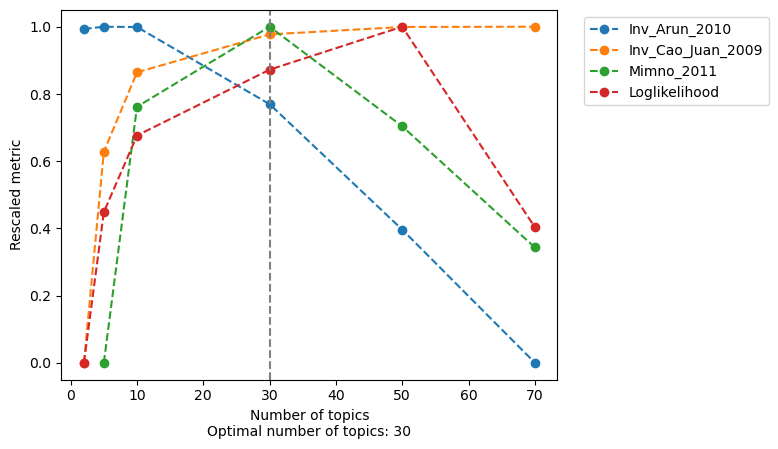

In [31]:
from pycisTopic.lda_models import *
model = evaluate_models(models,
                       select_model=30,
                       return_model=True,
                       metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                       plot_metrics=False)

We can conclude that the optimal number of topics is 30

Add the best model to the cistopic_obj and then we save it

In [32]:
cistopic_obj.add_LDA_model(model)
pickle.dump(cistopic_obj,
            open(os.path.join(work_dir, 'scATAC/cistopic_obj.pkl'), 'wb'))

We verify that it is well saved

In [33]:
cistopic_obj = pickle.load(open(os.path.join(work_dir, 'scATAC/cistopic_obj.pkl'), 'rb'))

Run UMAP and plot different interesting things

In [52]:
from pycisTopic.clust_vis import *
run_umap(cistopic_obj)  #scale=True) #target  = 'cell',

2023-11-21 09:15:16,758 cisTopic     INFO     Running UMAP


/home/roger/anaconda3/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'print':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "../../../../anaconda3/envs/myenv/lib/python3.9/site-packages/pynndescent/pynndescent_.py", line 252:[0m
[1mdef nn_descent_internal_low_memory_parallel(
    <source elided>
        if verbose:
[1m            print("\t", n + 1, " / ", n_iters)
[0m            [1m^[0m[0m
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function nn_descent_internal_low_memory_parallel at 0x7fb9e26488b0>))[0m
[0m[1mDuring: typing of call at /home/roger/anaconda3/envs/myenv/lib/python3.9/site-packages/pynndescent/pynndescent_.py (358)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function nn_descent_internal_low_memory_parallel at 0x7fb9e26488b0>))[0m
[0m[1mDuring: typing of call at /home/roger/anaconda3/envs/myenv/lib/python3.9/site-packages/pynndescent/pynndescent_.py (358)
[0m
[1m
File "../../../../anaconda3/envs/myenv/lib/python3.9/site-packages/pynndescent/pynndescent_.py", line 358:[0m
[1mdef nn_descent(
    <source elided>
    if low_memory:
[1m        nn_descent_internal_low_memory_parallel(
[0m        [1m^[0m[0m


In [40]:
plot_metadata(cistopic_obj, reduction_name = 'UMAP', variables = ['cell_type'])

KeyError: 'UMAP'

In [43]:
cell_topic_heatmap(cistopic_obj,
                     variables = ['cell_type'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10))

NotImplementedError: isna is not defined for MultiIndex

In [44]:
from pycisTopic.clust_vis import *
from pycisTopic.topic_binarization import *

In [45]:
print(cistopic_obj)

CistopicObject from project donor_0 with n_cells × n_regions = 7830 × 134203


### Calculate the binarized topics

In [46]:
region_bin_topics_top3k = binarize_topics(cistopic_obj, method='ntop', ntop = 3000)
region_bin_topics_otsu = binarize_topics(cistopic_obj, method='otsu')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Compute different accessible regions

In [47]:
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj, plot = False)
markers_dict = find_diff_features(cistopic_obj, imputed_acc_obj, variable='cell_type', var_features=variable_regions, split_pattern = '-')

2023-11-21 09:10:18,675 cisTopic     INFO     Imputing region accessibility
2023-11-21 09:10:18,676 cisTopic     INFO     Impute region accessibility for regions 0-20000
2023-11-21 09:10:19,594 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2023-11-21 09:10:20,507 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2023-11-21 09:10:21,327 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2023-11-21 09:10:22,146 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2023-11-21 09:10:22,963 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2023-11-21 09:10:23,776 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2023-11-21 09:10:24,360 cisTopic     INFO     Done!
2023-11-21 09:10:24,362 cisTopic     INFO     Normalizing imputed data
2023-11-21 09:10:29,074 cisTopic     INFO     Done!
2023-11-21 09:10:29,075 cisTopic     INFO     Calculating mean

<Figure size 640x480 with 0 Axes>

### Save the object

In [48]:
if not os.path.exists(os.path.join(work_dir, 'scATAC/candidate_enhancers')):
    os.makedirs(os.path.join(work_dir, 'scATAC/candidate_enhancers'))
import pickle
pickle.dump(region_bin_topics_otsu, open(os.path.join(work_dir, 'scATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'wb'))
pickle.dump(region_bin_topics_top3k, open(os.path.join(work_dir, 'scATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'wb'))
pickle.dump(markers_dict, open(os.path.join(work_dir, 'scATAC/candidate_enhancers/markers_dict.pkl'), 'wb'))